<a href="https://colab.research.google.com/github/nicolerene91/Python_Notebook_Sewell/blob/main/WordFrequency_BarChart_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


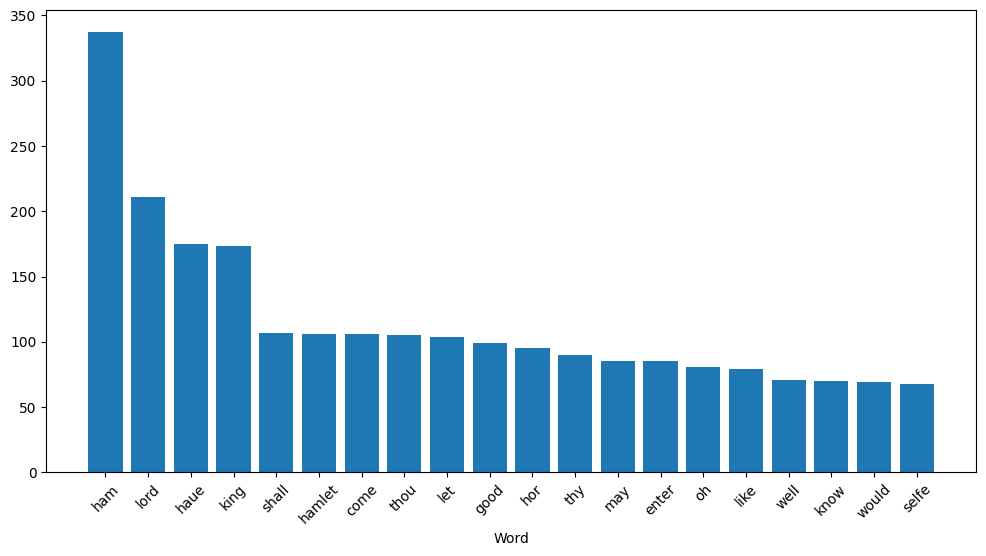

<ipython-input-3-a674f8aa14dd>:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


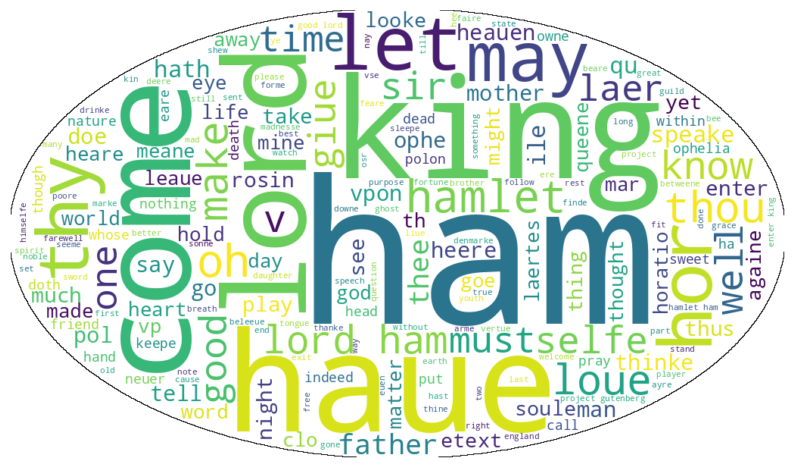

In [3]:
!pip install requests
import nltk
import requests
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import requests
from textblob import TextBlob
import imageio

# Download Hamlet
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Tokenize and preprocess text
blob = TextBlob(data)
words = [word.lower() for word in blob.words if word.isalpha()]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Calculate word frequencies, select top 20 words
freq_dist = FreqDist(filtered_words)
top_words = freq_dist.most_common(20)

# Create word bar chart
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words))
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()

# Generate word cloud
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

wordcloud = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    mask=mask_image,
    contour_width=1,
    contour_color='black',
).generate(' '.join(filtered_words))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()